In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data", names=["mcv","alkphos","sgpt","sgot","gammagt","target","test/train"])
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,target,test/train
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mcv         345 non-null    int64  
 1   alkphos     345 non-null    int64  
 2   sgpt        345 non-null    int64  
 3   sgot        345 non-null    int64  
 4   gammagt     345 non-null    int64  
 5   target      345 non-null    float64
 6   test/train  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [5]:
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,target,test/train
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


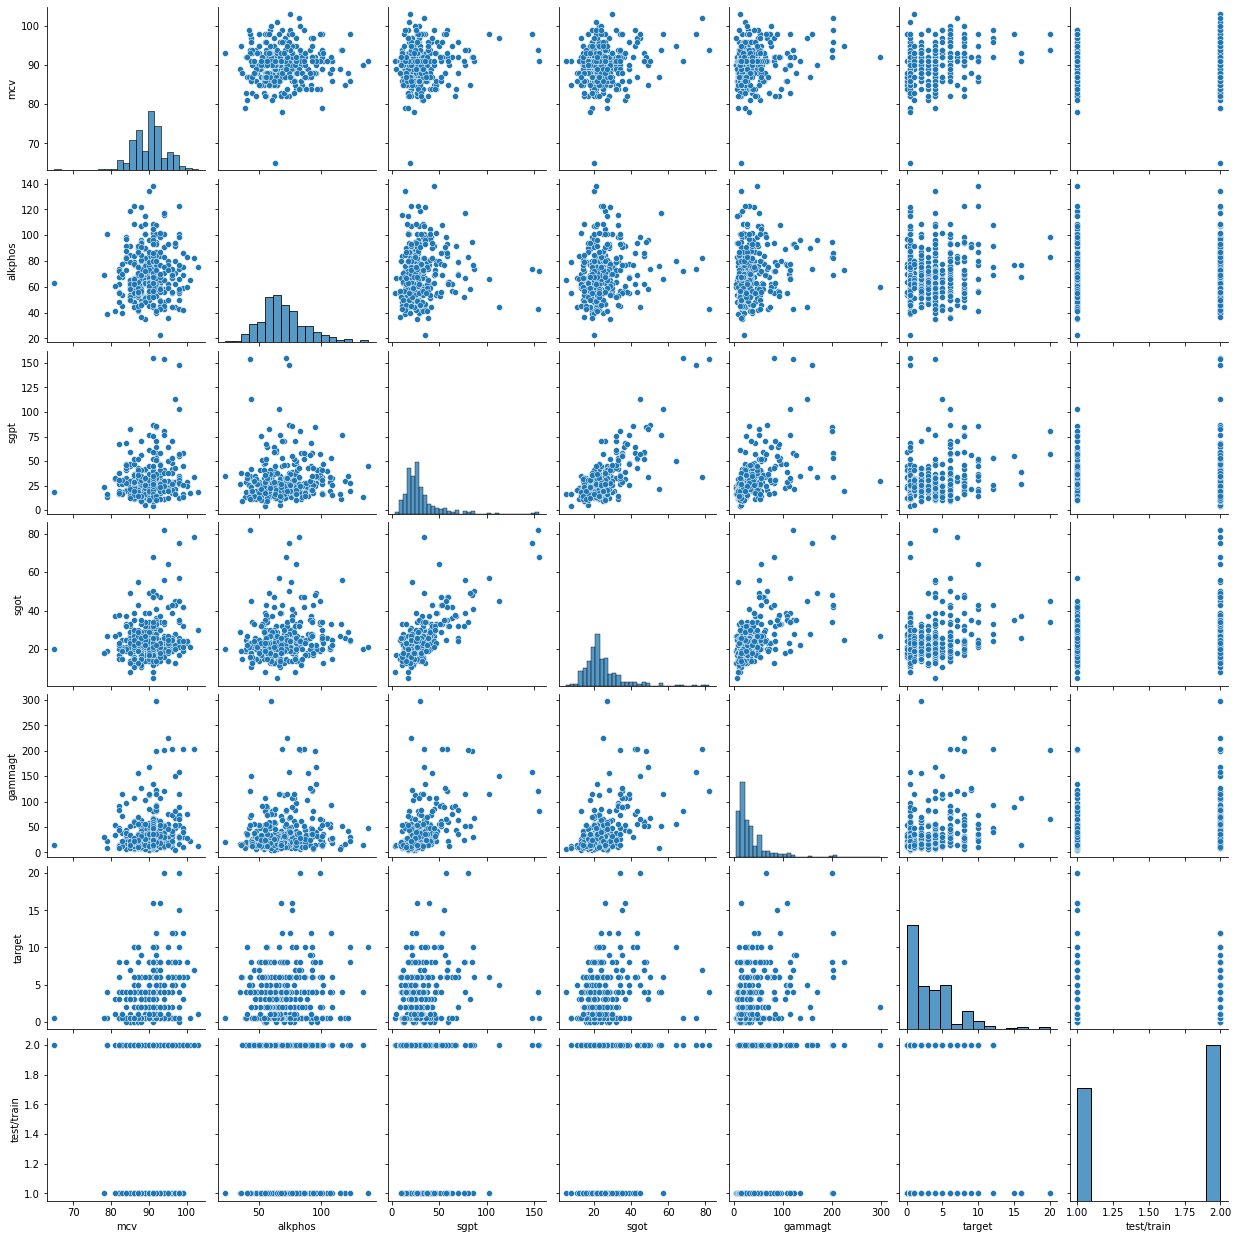

In [6]:
sns.pairplot(df)

In [7]:
y=df.target

In [8]:
x=df.values[:,[0,1]]

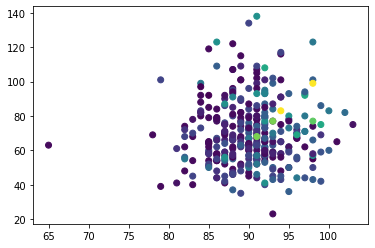

In [9]:
plt.scatter(x[:,0],x[:,1],c=y)

In [10]:
x1=df.values[:,[2,3]]

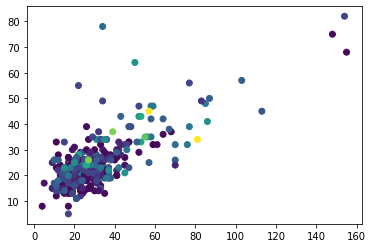

In [11]:
plt.scatter(x1[:,0],x1[:,1],c=y)

In [12]:
x2=df.values[:,[3,4]]

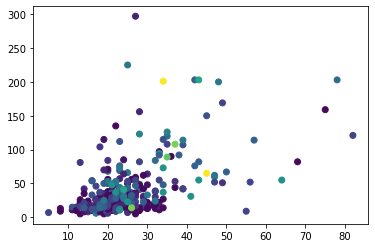

In [13]:
plt.scatter(x2[:,0],x2[:,1],c=y)

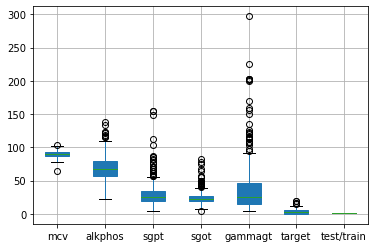

In [14]:
df.boxplot(patch_artist=True);

In [15]:
df.corr()

,mcv,alkphos,sgpt,sgot,gammagt,target,test/train
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680,-0.091070
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796,-0.098050
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848,-0.035009
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588,0.157356
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224,0.146393
target,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000,-0.022049
test/train,-0.091070,-0.098050,-0.035009,0.157356,0.146393,-0.022049,1.000000


In [16]:
t=pd.crosstab(df['target'],df['test/train'])
t

test/train,1,2
target,,
0.0,3,6
0.5,53,55
1.0,8,9
2.0,15,20
3.0,11,10
4.0,8,42
5.0,2,15
6.0,21,19
7.0,2,4


Text(0, 0.5, 'train/test')

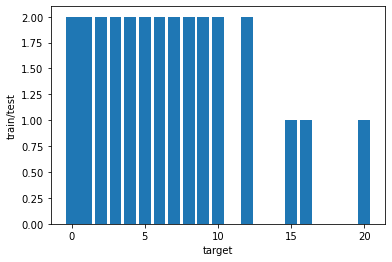

In [17]:
plt.bar(df['target'],df['test/train'])
plt.xlabel('target')
plt.ylabel('train/test')


In [18]:
train=df.loc[df['test/train'] ==2]

x_train = train.iloc[:,0:4]
y_train = train[['target']]


test=df.loc[df['test/train']==1]

x_test = test.iloc[:,0:4]
y_test = test[['target']]

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.intercept_

array([-9.91111875])

In [22]:
model.coef_

array([[ 0.12031701,  0.01705489, -0.02994837,  0.08561081]])

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
mean_squared_error(y_test,y_pred)

13.746941698901203

In [26]:
mean_absolute_error(y_test,y_pred)

2.7511059087566876

In [27]:
import math as m

In [28]:
m.sqrt(mean_squared_error(y_test,y_pred))

3.7076868393785904

In [29]:
m.sqrt(mean_absolute_error(y_test,y_pred))

1.6586458056971318